In [1]:
import numpy as np
from numpy import pi
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from cosmocalc import cosmocalc

In [2]:
c = 3.e8
c_over_H0_Mpc = 4283.
f0_21_Hz = 1420.e6
lamda0_IR_m = 120.e-9

In [9]:
def draw_2D_kspace2(z,Deltaz,Nf,theta_fov_rad,Nperp,col,label,R,sty,lw,wedge1_deg,wedge2_deg):
    WM,WV = 0.27,0.73
    Ez = np.sqrt(WM*(1+z)**3+WV)
    
    D = cosmocalc(z,WM=WM,WV=WV)['DCMR_Mpc']
    DeltaD = c_over_H0_Mpc*Deltaz/Ez
    
    dkpara = 2.*pi/DeltaD
    kparamax = float(Nf)/2*dkpara

    dkperp = 2.*pi/(theta_fov_rad*D)
    kperpmax = float(Nperp)/2*dkperp

    wedgeslope = D*Ez/(c_over_H0_Mpc*(1+z))*np.pi/180.*wedge1_deg
    wedgeslope2 = D*Ez/(c_over_H0_Mpc*(1+z))*np.pi/180.*wedge2_deg
    
    plt.loglog([dkperp,kperpmax,kperpmax,dkperp,dkperp],[dkpara,dkpara,kparamax,kparamax,dkpara],sty,color=col,lw=lw,label=label)
    
    nbinlines = 10
    for i in range(min(Nf/2,nbinlines)):
        plt.plot([dkperp,kperpmax],[i*dkpara,i*dkpara],sty,color=col,lw=1)
    for j in range(nbinlines):
        plt.plot([j*dkperp,j*dkperp],[dkpara,kparamax],sty,color=col,lw=1)

    plt.text(np.sqrt(dkperp*kperpmax),.94*dkpara,'$\Delta$ z=%1.1f'%Deltaz,horizontalalignment='center',verticalalignment='top',fontsize=16,color=col)
    plt.text(np.sqrt(dkperp*kperpmax),1.05*kparamax,'R=%d'%R,horizontalalignment='center',verticalalignment='bottom',fontsize=16,color=col)
    plt.text(kperpmax*.98,np.sqrt(dkpara*kparamax)," %d'"%np.round(theta_fov_rad/Nperp*180*60/np.pi),horizontalalignment='left',verticalalignment='center',fontsize=16,color=col)
    plt.text(dkperp,np.sqrt(dkpara*kparamax),u'%d° '%np.round(theta_fov_rad*180/np.pi),horizontalalignment='right',verticalalignment='center',fontsize=16,color=col)

    wedgelabel='' if Deltaz>1 else 'Horizon wedge'
    wedgelabel2='' if Deltaz>1 else u'15° wedge'
    plt.loglog([1.e-4,1.e4],[1.e-4*wedgeslope,1.e4*wedgeslope],'k:',lw=2,label=wedgelabel)
    plt.loglog([1.e-4,1.e4],[1.e-4*wedgeslope2,1.e4*wedgeslope2],'k:',lw=2,label=wedgelabel2)
    
def p2(z,Deltaz,theta_fov_deg,dtheta_amin,R_IR,col,label='',title=None,sty='-',lw=1,hidexlabel=False,hideylabel=False,xtitle='',wedge1_deg=90,wedge2_deg=45):    
    theta_fov_rad = theta_fov_deg*pi/180.
    dtheta_rad = dtheta_amin/60.*pi/180.
    Nperp_21 = int(theta_fov_rad/dtheta_rad)
    
    dz_IR = (1+z)/R_IR
    Nf_IR = int(np.round(Deltaz / dz_IR))
        
    draw_2D_kspace2(z,Deltaz,Nf_IR,theta_fov_rad,Nperp_21,col,label,R_IR,sty,lw,wedge1_deg,wedge2_deg)

    plt.ylim([.005,.1])
    plt.xlim([.001,1])
    h=plt.ylabel('$k_\parallel$')
    h.set_rotation(0)
    plt.xlabel('$k_\perp$')
    if title: plt.title(title,fontsize = 20)
        
    #plt.text(.003,.075,'$\Delta z=$%1.1f'%Deltaz,horizontalalignment='center',verticalalignment='center',fontsize=16,color='k')
        
    if hidexlabel: plt.xlabel('')
    if hideylabel: plt.ylabel('')

In [10]:
lamda = 1.
mwa_primary_beam_half_width_deg = lamda/4./2*180/np.pi
hera_primary_beam_half_width_deg = lamda/14./2*180/np.pi
ska_primary_beam_half_width_deg = lamda/30./2*180/np.pi

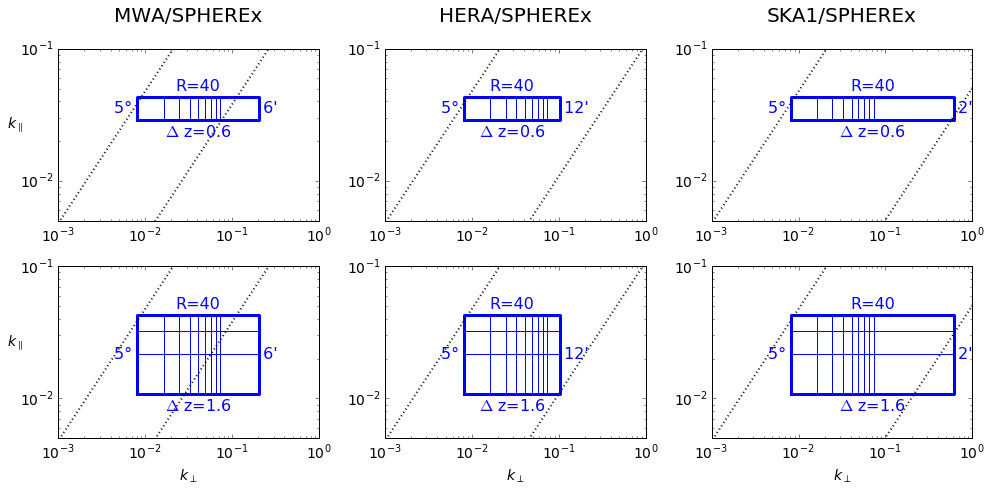

In [11]:
plt.figure(figsize=(14,7))
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams.update({'font.size': 14})

gray='#ff9999'
z=7.

plt.subplot(231)
p2(z=z, Deltaz=.6, theta_fov_deg=5., dtheta_amin=6., R_IR=40,col='b',lw=3,title='MWA/SPHEREx\n',hidexlabel=True,wedge1_deg=90.,wedge2_deg=mwa_primary_beam_half_width_deg)

plt.subplot(232)
p2(z=z, Deltaz=.6, theta_fov_deg=5., dtheta_amin=12., R_IR=40,col='b',lw=3,title='HERA/SPHEREx\n',hidexlabel=True,hideylabel=True,wedge1_deg=90.,wedge2_deg=hera_primary_beam_half_width_deg)

plt.subplot(233)
p2(z=z, Deltaz=.6, theta_fov_deg=5., dtheta_amin=2., R_IR=40,col='b',lw=3,title='SKA1/SPHEREx\n',hidexlabel=True,hideylabel=True,wedge1_deg=90.,wedge2_deg=ska_primary_beam_half_width_deg)

plt.subplot(234)
p2(z=z, Deltaz=1.6, theta_fov_deg=5., dtheta_amin=6., R_IR=40,col='b',lw=3,wedge1_deg=90.,wedge2_deg=mwa_primary_beam_half_width_deg)

plt.subplot(235)
p2(z=z, Deltaz=1.6, theta_fov_deg=5., dtheta_amin=12., R_IR=40,col='b',lw=3,hideylabel=True,wedge1_deg=90.,wedge2_deg=hera_primary_beam_half_width_deg)

plt.subplot(236)
p2(z=z, Deltaz=1.6, theta_fov_deg=5., dtheta_amin=2., R_IR=40,col='b',lw=3,hideylabel=True,wedge1_deg=90.,wedge2_deg=ska_primary_beam_half_width_deg)


plt.tight_layout()
plt.savefig('kspace_overlap.pdf',bbox_inches='tight')